## Background
- Indium is a chemical element with the symbol In and atomic number 49. 
- It is a post-transition metal that makes up 0.21 parts per million of the Earth's crust

- Germanium abundance in the Earth’s is 1.3 ppm

## Get Data

In [44]:
import pandas as pd
import numpy as np

In [45]:
df = pd.read_csv('Merged_lessthan15km_In_Ge.csv')
df.head(5)

,Unnamed: 0,Unnamed: 0_x,Zn,Ag,Cu,Pb,Au,Co,In,Ge,lat,long,Unnamed: 0_y,minedex_coords,minedex_site,wamex_lat,wamex_lon,distance
0,0,24985,14.0,0.03,11.6,1.2,NaN,1.6,0.007,0.025,-23.722310,119.290297,2271,"(-23.715655, 119.281652)",S0002505,-23.722310,119.290297,1.1490822602067268 km
1,1,24986,18.0,0.05,55.7,1.4,NaN,4.4,0.053,0.110,-23.722511,119.290732,3573,"(-23.715655, 119.281652)",S0002505,-23.722511,119.290732,1.1974451584269783 km
2,2,24987,72.0,0.10,54.2,21.8,NaN,14.9,0.076,0.070,-23.720042,119.286168,3473,"(-23.715655, 119.281652)",S0002505,-23.720042,119.286168,0.6694362586362227 km
3,3,24988,2560.0,1.56,127.5,790.0,NaN,7.6,0.488,0.025,-23.718043,119.284555,822,"(-23.715655, 119.281652)",S0002505,-23.718043,119.284555,0.39696698159245797 km
4,4,24989,235.0,0.11,68.1,15.0,NaN,14.1,0.026,0.120,-23.717327,119.283532,3704,"(-23.715655, 119.281652)",S0002505,-23.717327,119.283532,0.2665421695325017 km


In [46]:
df.columns

Index(['Unnamed: 0', 'Unnamed: 0_x', 'Zn', 'Ag', 'Cu', 'Pb', 'Au', 'Co', 'In',
       'Ge', 'lat', 'long', 'Unnamed: 0_y', 'minedex_coords', 'minedex_site',
       'wamex_lat', 'wamex_lon', 'distance'],
      dtype='object')

## Preprocess Data

In [47]:
df = df.drop(columns=['Unnamed: 0', 'Unnamed: 0_x', 'lat', 'long', 'Unnamed: 0_y', 'minedex_coords',
       'minedex_site', 'distance']).drop_duplicates()

In [48]:
df.shape

(2076, 10)

In [49]:
df = df.dropna()
df.shape

(1792, 10)

In [50]:
df.columns

Index(['Zn', 'Ag', 'Cu', 'Pb', 'Au', 'Co', 'In', 'Ge', 'wamex_lat',
       'wamex_lon'],
      dtype='object')

In [51]:
df_loc = df
df = df.drop(columns=['wamex_lat','wamex_lon'])

In [52]:
df.shape

(1792, 8)

In [53]:
in_abundance = 0.21
ge_abundance = 1.3

### Predict Germanium

In [54]:
df_loc_ge = df_loc

In [55]:
df_loc_ge.target = df_loc.loc[:, ["Ge"]]
df_loc_ge.data = df_loc.drop(['Ge'],axis=1)

<ipython-input-55-52d1ba17771e>:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  df_loc_ge.target = df_loc.loc[:, ["Ge"]]
<ipython-input-55-52d1ba17771e>:2: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  df_loc_ge.data = df_loc.drop(['Ge'],axis=1)


In [56]:
df_loc_ge.target.shape

(1792, 1)

In [57]:
# Transform value of Ge to factor
def if_ge_abundance(ge):
    if ge > 1.3:
        return 1
    else:
        return 0
df_loc_ge.target = df_loc_ge.target.applymap(if_ge_abundance)

<AxesSubplot:ylabel='Frequency'>

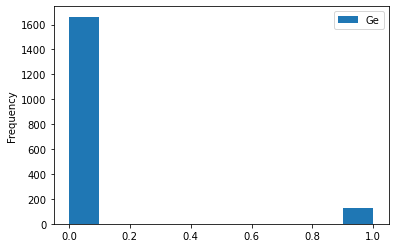

In [58]:
df_loc_ge.target.plot(kind='hist')

#### Log transform

In [59]:
def log_transform (var):
    return np.log(var + 1) 

In [60]:
#df_loc_ge.datalog = df_loc_ge.data.applymap(log_transform)
#df_loc_ge.datalog = df_loc_ge.data.apply(lambda x: log_transform(x['Zn'], x['Ag'], x['Cu'],x['Pb'],x['Au'], x['Co'], x['In']), axis=1)


df_loc_ge.data[['Zn', 'Ag', 'Cu', 'Pb', 'Au', 'Co', 'In']] = df_loc_ge.data[['Zn', 'Ag', 'Cu', 'Pb', 'Au', 'Co', 'In']].apply(log_transform)

In [61]:
df_loc_ge.data.head(5)

,Zn,Ag,Cu,Pb,Au,Co,In,wamex_lat,wamex_lon
6,6.265301,0.246860,4.409155,6.381816,0.004988,3.908015,0.054488,-23.709158,119.271840
9,4.962845,0.067659,4.510860,3.471966,0.004988,3.165475,0.080658,-23.697506,119.251256
10,3.871201,0.307485,4.629863,4.570579,0.004988,2.116256,0.029559,-23.700995,119.257777
11,3.465736,0.048790,4.195697,2.230014,0.004988,2.151762,0.030529,-23.726979,119.294428
12,4.234107,0.139762,5.327876,2.917771,0.004988,1.526056,0.119559,-23.726545,119.291410


In [62]:
from sklearn.model_selection import train_test_split

In [63]:
X_train, X_test, y_train, y_test = train_test_split(df_loc_ge.data, df_loc_ge.target, test_size=0.3,random_state=109) # 70% training and 30% test

In [64]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

/Users/xiaohan/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [65]:
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))
print("F1 Score:", metrics.f1_score(y_test,y_pred))

Accuracy: 0.9089219330855018
Precision: 0.25
Recall: 0.2
F1 Score: 0.22222222222222224


In [66]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred=model.predict(X_test)

/Users/xiaohan/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Users/xiaohan/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [67]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))
print("F1 Score:", metrics.f1_score(y_test,y_pred))

Accuracy: 0.9386617100371747
Precision: 0.5625
Recall: 0.2571428571428571
F1 Score: 0.3529411764705882


#### Without location

In [68]:
df_loc_ge.data = df_loc_ge.data.drop(columns=['wamex_lat','wamex_lon'])
X_train, X_test, y_train, y_test = train_test_split(df_loc_ge.data, df_loc_ge.target, test_size=0.3,random_state=109) # 70% training and 30% test

In [69]:
model = GaussianNB()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))
print("F1 Score:", metrics.f1_score(y_test,y_pred))

Accuracy: 0.9107806691449815
Precision: 0.25925925925925924
Recall: 0.2
F1 Score: 0.22580645161290322


/Users/xiaohan/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [70]:
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred=model.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))
print("F1 Score:", metrics.f1_score(y_test,y_pred))

Accuracy: 0.9460966542750929
Precision: 1.0
Recall: 0.17142857142857143
F1 Score: 0.2926829268292683


/Users/xiaohan/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


### Predict Indium

In [71]:
df_loc_in = df_loc

In [72]:
df_loc_in.target = df_loc.loc[:, ["In"]]
df_loc_in.data = df_loc.drop(['In'],axis=1)

In [73]:
# Transform value of Ge to factor
def if_in_abundance(ge):
    if ge > 0.21:
        return 1
    else:
        return 0
df_loc_in.target = df_loc_in.target.applymap(if_in_abundance)

<AxesSubplot:ylabel='Frequency'>

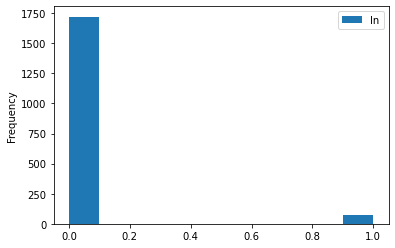

In [74]:
df_loc_ge.target.plot(kind='hist')

### Log transform

In [75]:
df_loc_in.data[['Zn', 'Ag', 'Cu', 'Pb', 'Au', 'Co', 'Ge']] = df_loc_in.data[['Zn', 'Ag', 'Cu', 'Pb', 'Au', 'Co', 'Ge']].apply(log_transform)

In [76]:
df_loc_in.data.head(5)

,Zn,Ag,Cu,Pb,Au,Co,Ge,wamex_lat,wamex_lon
6,6.265301,0.246860,4.409155,6.381816,0.004988,3.908015,0.058269,-23.709158,119.271840
9,4.962845,0.067659,4.510860,3.471966,0.004988,3.165475,0.104360,-23.697506,119.251256
10,3.871201,0.307485,4.629863,4.570579,0.004988,2.116256,0.095310,-23.700995,119.257777
11,3.465736,0.048790,4.195697,2.230014,0.004988,2.151762,0.024693,-23.726979,119.294428
12,4.234107,0.139762,5.327876,2.917771,0.004988,1.526056,0.165514,-23.726545,119.291410


In [77]:
X_train, X_test, y_train, y_test = train_test_split(df_loc_in.data, df_loc_in.target, test_size=0.3,random_state=109) # 70% training and 30% test

In [78]:
model = GaussianNB()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

/Users/xiaohan/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [79]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))
print("F1 Score:", metrics.f1_score(y_test,y_pred))

Accuracy: 0.9349442379182156
Precision: 0.3191489361702128
Recall: 0.8333333333333334
F1 Score: 0.4615384615384616


In [80]:
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred=model.predict(X_test)

/Users/xiaohan/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Users/xiaohan/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [81]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))
print("F1 Score:", metrics.f1_score(y_test,y_pred))

Accuracy: 0.9758364312267658
Precision: 0.7777777777777778
Recall: 0.3888888888888889
F1 Score: 0.5185185185185185


#### Without location

In [82]:
df_loc_in.data = df_loc_in.data.drop(columns=['wamex_lat','wamex_lon'])

In [83]:
X_train, X_test, y_train, y_test = train_test_split(df_loc_in.data, df_loc_in.target, test_size=0.3,random_state=109) # 70% training and 30% test

In [84]:
model = GaussianNB()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))
print("F1 Score:", metrics.f1_score(y_test,y_pred))

Accuracy: 0.9423791821561338
Precision: 0.3488372093023256
Recall: 0.8333333333333334
F1 Score: 0.4918032786885246


/Users/xiaohan/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [85]:
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred=model.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))
print("F1 Score:", metrics.f1_score(y_test,y_pred))

Accuracy: 0.983271375464684
Precision: 1.0
Recall: 0.5
F1 Score: 0.6666666666666666


/Users/xiaohan/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [96]:
X_train.columns

Index(['Zn', 'Ag', 'Cu', 'Pb', 'Au', 'Co', 'Ge'], dtype='object')

In [91]:
feature_names = ["Zn","Ag","Cu","Pb","Au","Co","Ge"]
class_names = ["Not abundance","Abundance"]

In [104]:
import lime
import lime.lime_tabular
explainer = lime.lime_tabular.LimeTabularExplainer(X_train.iloc[:,:].values, feature_names=feature_names, class_names=class_names)
i = np.random.randint(0, X_test.shape[0])


In [112]:
X_test.iloc[i,:]

Zn    4.454347
Ag    0.095310
Cu    4.629863
Pb    5.178971
Au    0.004988
Co    2.653242
Ge    0.024693
Name: 64, dtype: float64

In [113]:
exp = explainer.explain_instance(X_test.iloc[i,:], model, num_features=2,top_labels=1)
exp.show_in_notebook(show_table=True,show_all=False)

TypeError: 'LogisticRegression' object is not callable

Next step: transform all variables to classes then predict abundance of target minerals in order to introduce LIME